<a href="https://colab.research.google.com/github/rai-shi/Machine-Learning-Gelecegi-Yazanlar/blob/main/ridge_regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection

import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

beyzbol oyuncularına ait bir veri seti

oyunculara ilişkin veriler var

maaş tahmini yapılacak

In [85]:
# get dataset
df = pd.read_csv("/content/Hitters.csv")
# drop null values
df = df.dropna()
# categoric to dummy (one hot encoding)
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
# label
Y = df["Salary"]
# drop label and categoric columns
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
# features with remains and dummies
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

In [185]:
df["Salary"].describe().T

,Salary
count,263.000000
mean,535.925882
std,451.118681
min,67.500000
25%,190.000000
50%,425.000000
75%,750.000000
max,2460.000000


In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42)

In [87]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [88]:
df.shape

(263, 20)

In [89]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


In [90]:
X.shape

(263, 19)

In [91]:
ridge_model = Ridge(alpha=0.1).fit(x_train, y_train)

In [92]:
ridge_model
# ridge_model
# Linear least squares with l2 regularization.

# Minimizes the objective function::

# ||y - Xw||^2_2 + alpha * ||w||^2_2

Ridge(alpha=0.1)

In [93]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [94]:
ridge_model.intercept_

-4.578626905723354

In [95]:
ridge_model2 = Ridge(alpha=5).fit(x_train, y_train)

In [96]:
ridge_model2.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [97]:
ridge_model2.intercept_

-3.4251968687169665

In [98]:
# farklı lambda katsayılarına göre farklı katsayı değişimleri nasıl olur

In [121]:
np.linspace(10, -2, 100) # 10 -2 arasında 100 random sayı

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [125]:
lambdas = 10**np.linspace(10, -2, 100)*0.5

In [126]:
lambdas[:10]

array([10. ,  9.9,  9.8,  9.7,  9.6,  9.5,  9.4,  9.3,  9.2,  9.1])

In [102]:
ridge_model = Ridge()
coefs = []

In [103]:
for i in lambdas:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(x_train, y_train)
  coefs.append(ridge_model.coef_)


In [104]:
# coefs

Text(0, 0.5, 'coefficients')

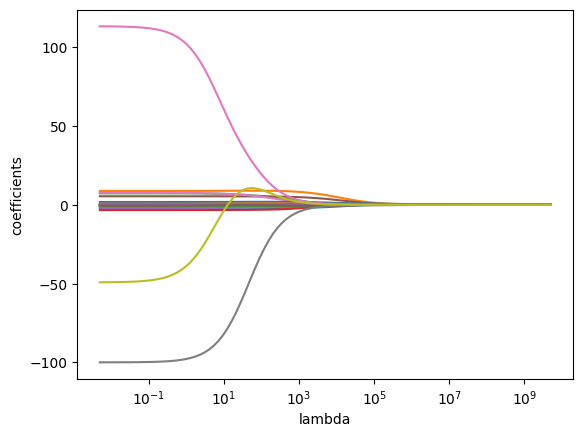

In [105]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("lambda")
plt.ylabel("coefficients")

# farklı lambda değerlerine karşılık farklı katsayı oluşumları
# katsayılar öyle bir yerde olmalı ki hata kareler min olmalı
# ridge alpha arttıkça anlamsız featureların katsayıları 0'a çekilir

In [106]:
# tahmin
ridge_model = Ridge().fit(x_train, y_train)
y_pred = ridge_model.predict(x_train)
y_pred[0:10]

# train hatası test hatasının kötü bir tahmincisidir.

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [107]:
y_train[0:10]

,Salary
183,125.0
229,1940.0
286,940.0
102,375.0
153,100.0
320,960.0
135,90.0
213,100.0
308,750.0
161,657.0


In [108]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [109]:
# cross validation ile valide edilmiş train hatası alınır
# daha doğru hata
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model, x_train, y_train, cv=10, scoring="neg_mean_squared_error")))

351.3931585606325

In [110]:
# test hatası

y_pred = ridge_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.80829057302424

In [111]:
np.sqrt(np.mean(-cross_val_score(ridge_model, x_test, y_test, cv=10, scoring="neg_mean_squared_error")))

474.5524681878837

In [169]:
lambdas = np.linspace(10, 10**5 , 5000)

In [170]:
lambdas[:85]

array([  10.        ,   30.0020004 ,   50.0040008 ,   70.0060012 ,
         90.0080016 ,  110.010002  ,  130.0120024 ,  150.0140028 ,
        170.0160032 ,  190.0180036 ,  210.020004  ,  230.0220044 ,
        250.0240048 ,  270.0260052 ,  290.0280056 ,  310.030006  ,
        330.0320064 ,  350.0340068 ,  370.0360072 ,  390.0380076 ,
        410.040008  ,  430.0420084 ,  450.0440088 ,  470.0460092 ,
        490.0480096 ,  510.05001   ,  530.0520104 ,  550.0540108 ,
        570.0560112 ,  590.0580116 ,  610.060012  ,  630.0620124 ,
        650.0640128 ,  670.0660132 ,  690.0680136 ,  710.070014  ,
        730.0720144 ,  750.0740148 ,  770.0760152 ,  790.0780156 ,
        810.080016  ,  830.0820164 ,  850.0840168 ,  870.0860172 ,
        890.0880176 ,  910.090018  ,  930.0920184 ,  950.0940188 ,
        970.0960192 ,  990.0980196 , 1010.10002   , 1030.1020204 ,
       1050.1040208 , 1070.1060212 , 1090.1080216 , 1110.110022  ,
       1130.1120224 , 1150.1140228 , 1170.1160232 , 1190.11802

In [174]:
ridge_model = Ridge()
coefs = []
errors = []
for i in lambdas:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(x_train, y_train)
  coefs.append(ridge_model.coef_)
  errors.append(np.sqrt(np.mean(-cross_val_score(ridge_model, x_test, y_test, cv=10, scoring="neg_mean_squared_error"))))

In [175]:
print(errors.index(min(errors)), min(errors))

4999 415.2935887481573


In [176]:
coefs[99]

array([-1.74333186,  7.5704784 ,  1.73048751, -1.534091  , -0.09763528,
        4.52217352,  1.19095946, -0.12997191, -0.1833585 , -0.75394157,
        1.645116  ,  0.78722413, -0.51760909,  0.27565987,  0.25419596,
       -0.60739129,  1.51588338, -2.24670772,  0.9876385 ])

In [177]:
lambdas[99]

1990.1980396079214

In [178]:
# model_tuning
# alpha parametresi hiperparametre olduğundan artık tuning yapıyoruz

In [179]:
lambdas = 10**np.linspace(10, -2, 100)*0.5

In [181]:
ridge_cv = RidgeCV(alphas = lambdas, scoring = "neg_mean_squared_error", cv = 10)
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [182]:
ridge_cv.alpha_ # optimum lambda

1526927.7544167063

In [183]:
# final model
tuned_model = Ridge(alpha=ridge_cv.alpha_).fit(x_train, y_train)
np.sqrt(np.mean(-cross_val_score(tuned_model, x_test, y_test, cv=10, scoring="neg_mean_squared_error")))

420.4084862956658

In [184]:
y_pred = tuned_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

385.8643856146936

In [ ]:
# RMSE, hedef değişkenin birimiyle aynı birime sahiptir. Örneğin, maaş tahmini yapıyorsan ve maaşlar 1000-5000 dolar aralığında değişiyorsa, 350 RMSE çok yüksek olabilir. Ama milyon dolar seviyesinde bir değişken için 350 düşük bile olabilir.

RMSE ve Standart Sapma Karşılaştırması
Genel kural:

RMSE ≈ Standart Sapma (σ) ise modelin makul tahminler yapıyor olabilir.
RMSE ≫ Standart Sapma ise modelin hatası çok yüksek, bu durumda modeli iyileştirmek gerekebilir.
RMSE ≪ Standart Sapma ise model aşırı öğrenme (overfitting) yapıyor olabilir.